In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc

**1.1a**

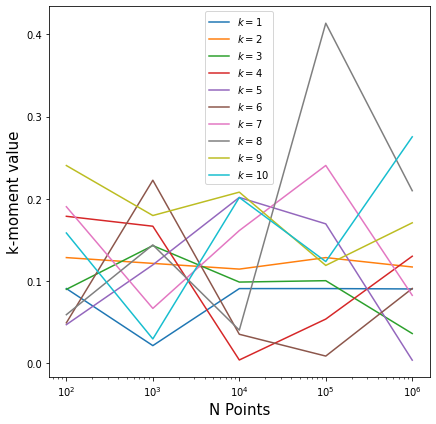

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import rc
from tqdm import tqdm

class MyRandom():
    def Random(self):
        return np.random.rand()
    def TestMethod(self, Npoints, moment):
        rand = MyRandom
        array = np.zeros(Npoints)
        for i in range(Npoints): 
            array[i] = rand.Random(self)
        return np.sqrt(Npoints)* np.abs( np.mean(array**moment) - 1./(1.+moment) )

Points = np.logspace(2,6,5)
NMoments = 10
Moments1 = []
for k in range(NMoments): 
    test = []
    for i in range(len(Points)): 
        test.append(MyRandom.TestMethod(int(Points[i]),k+1,10)) 
    Moments1.append(test)

labelk = []
for i in range(NMoments):
             labelk.append(i+1)
        
fig = plt.figure( figsize=(15,15) )
ax1 = fig.add_subplot(2,2,1)
for i in range(NMoments):
    ax1.plot(Points,Moments1[i], label=r'$k=%.0f$' %(labelk[i]))
ax1.set_xscale('log')
ax1.set_xlabel('N Points', fontsize=15)
ax1.set_ylabel('k-moment value', fontsize=15)
ax1.legend()

**1.1b**

Text(0, 0.5, 'C(k)')

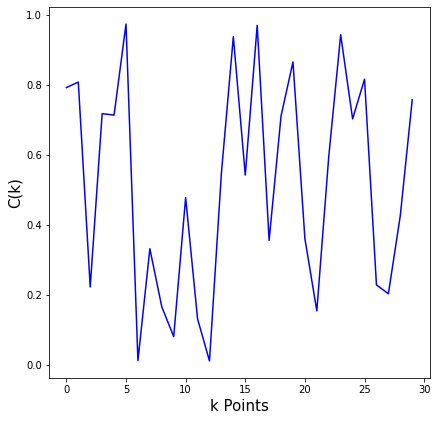

In [3]:
x = np.random.random(31)

N=10000
sumas = []
v = []
for k in range(0,len(x)-1):
    valores = []
    n=0
    for i in range(N):
        n+=(x[0+k])
    p = (1/N)*n
    sumas.append(p)
    v.append(k)
fig = plt.figure( figsize=(15,15) )
ax1 = fig.add_subplot(2,2,1)
ax1.plot(v,sumas,'b')
ax1.set_xlabel('k Points', fontsize=15)
ax1.set_ylabel('C(k)', fontsize=15)

**2.1**

  0%|          | 99/100000 [00:00<11:20, 146.89it/s]


Text(0, 0.5, '$Interations$')

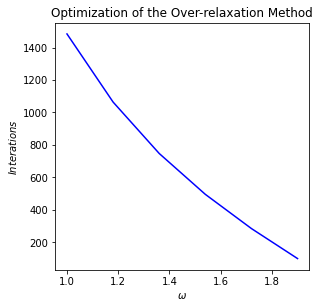

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
from tqdm import tqdm

# Discretizamos el espacio
Xmin, Xmax, NpointsX = 0.,40.,51
Ymin, Ymax, NpointsY = 0.,40.,51

x = np.linspace(Xmin,Xmax,NpointsX)
y = np.linspace(Xmin,Xmax,NpointsY)


def h1(y):
    return 75.

def h2(y):
    return 50.

def h3(x):
    return 100.

def h4(x):
    return 0.

def InitT():
    
    T = np.zeros( (NpointsX,NpointsY) )
    
    # Fijando las fronteras
    T[0,:] = h1(y)
    T[-1,:] = h2(y)
    
    T[:,0] = h3(x)
    T[:,-1] = h4(x)
    
    return T
def GetRelaxation(T, omega):
    
    itmax = 0
    
    for it in tqdm( range(int(1e5)) ):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                tmp = 0.25*( T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1] )
                r = (tmp - T[i,j])
                
                T[i,j] += omega*r
                
                if np.abs(r) > dmax:
                    dmax = r
                    
        if np.abs(dmax) < 1e-3:
            itmax = it
            break
            
    return itmax
omegas = np.linspace(1.,1.9,6)
its = []

for i in range(0,len(omegas)):
    T = InitT()
    itmax = GetRelaxation(T, omega=omegas[i]) 
    its.append(itmax)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.plot(omegas,its,'b')
ax.set_title('Optimization of the Over-relaxation Method')
ax.set_xlabel('$\omega$', fontsize=10)
ax.set_ylabel('$Interations$', fontsize=10)


**Cuando w es mayor o igual a 2, ocurre una divergencia en la optimización**